In [2]:
# Multinomial naive bayes
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
bow_df = pd.read_csv("bow.csv")
tfidf_df = pd.read_csv("tfidf.csv")
trigram_df = pd.read_csv("trigram.csv")
print(bow_df.head())
print(tfidf_df.head())
print(trigram_df.head())



   00  000  00pm  01  02  03  04  05  050  06  ...  znga  zone  zoom  zot  \
0   0    0     0   0   0   0   0   0    0   0  ...     0     0     0    0   
1   0    0     0   0   0   0   0   0    0   0  ...     0     0     0    0   
2   0    0     0   0   0   0   0   0    0   0  ...     0     0     0    0   
3   0    0     0   0   0   0   0   0    0   0  ...     0     0     0    0   
4   0    0     0   0   0   0   0   0    0   0  ...     0     0     0    0   

   zynga  æinen  æl  ærvi  œwe  class_label  
0      0      0   0     0    0           -1  
1      0      0   0     0    0            1  
2      0      0   0     0    0            1  
3      0      0   0     0    0            1  
4      0      0   0     0    0            1  

[5 rows x 5831 columns]
    00  000  00pm   01   02   03   04   05  050   06  ...  znga  zone  zoom  \
0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

In [4]:
x_train_bow, x_test_bow, y_train_bow, y_test_bow = train_test_split(bow_df.iloc[:,:-1], bow_df.iloc[:,-1], test_size=0.2, random_state=42)
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_df.iloc[:,:-1], tfidf_df.iloc[:,-1], test_size=0.2, random_state=42)
x_train_trigram, x_test_trigram, y_train_trigram, y_test_trigram = train_test_split(trigram_df.iloc[:,:-1], trigram_df.iloc[:,-1], test_size=0.2, random_state=42)

x_train = [x_train_bow, x_train_tfidf, x_train_trigram]
x_test = [x_test_bow, x_test_tfidf, x_test_trigram]
y_train = [y_train_bow, y_train_tfidf, y_train_trigram]
y_test = [y_test_bow, y_test_tfidf, y_test_trigram]
feature_names = ["BOW", "TF-IDF", "Trigram"]

In [5]:
gs_per_feature = []

for i in range(3):
  gs_MNB = GridSearchCV(MultinomialNB(), {'alpha': np.linspace(0.1, 2, 20)}, cv=5, scoring="f1")
  gs_MNB.fit(x_train[i], y_train[i])
  gs_per_feature.append(gs_MNB)
  print(feature_names[i])
  print("Best params:", gs_MNB.best_params_)
  print("Best score:", gs_MNB.best_score_, "\n")

BOW
Best params: {'alpha': np.float64(1.8)}
Best score: 0.8319927444703664 

TF-IDF
Best params: {'alpha': np.float64(0.5)}
Best score: 0.8379456577466149 

Trigram
Best params: {'alpha': np.float64(1.4)}
Best score: 0.8012358921585712 



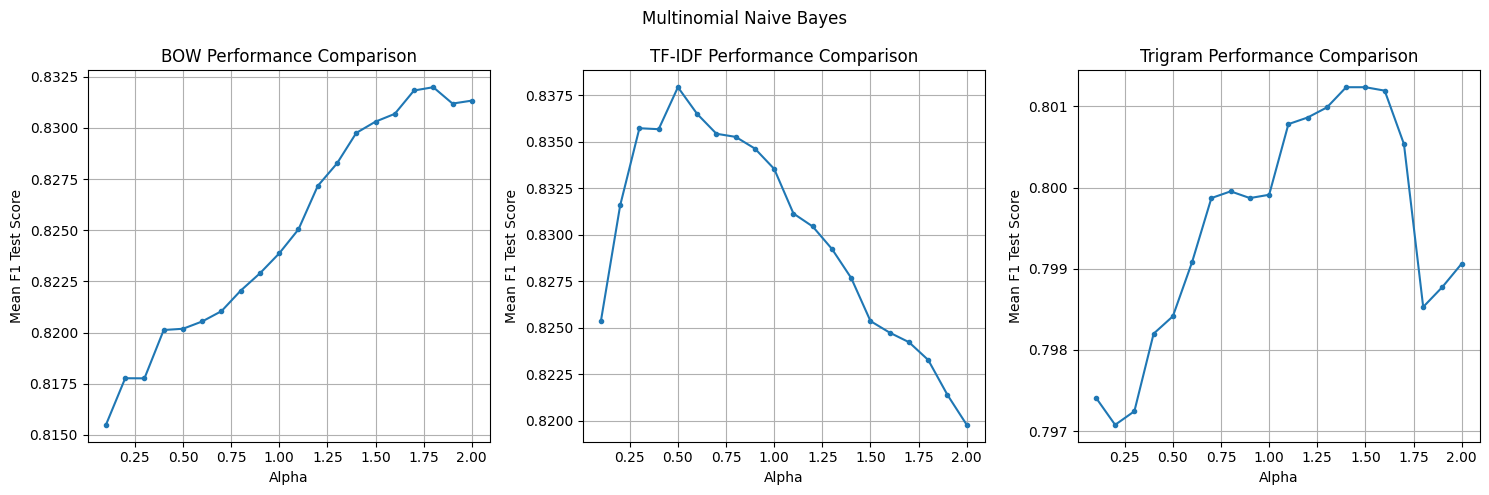

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):

  results_NB = pd.DataFrame(gs_per_feature[i].cv_results_['params'])
  results_NB['test_score'] = gs_per_feature[i].cv_results_['mean_test_score']

  axes[i].plot(results_NB['alpha'], results_NB['test_score'], marker = '.')

  axes[i].set_title(feature_names[i] + " Performance Comparison")
  axes[i].grid(True)
  axes[i].set_xlabel("Alpha")
  axes[i].set_ylabel("Mean F1 Test Score")


plt.suptitle("Multinomial Naive Bayes")
plt.tight_layout()
plt.show()



In [7]:
y_pred_test = []
for i in range(3):
  print("\t\t\t" + feature_names[i])
  mnb = MultinomialNB(alpha=gs_per_feature[i].best_params_['alpha'])
  mnb.fit(x_train[i], y_train[i])
  y_pred_train = mnb.predict(x_train[i])
  y_pred_test.append(mnb.predict(x_test[i]))
  print("Train report:\n", classification_report(y_train[i], y_pred_train))
  print("Test report:\n", classification_report(y_test[i], y_pred_test[i]) + "\n")

			BOW
Train report:
               precision    recall  f1-score   support

          -1       0.83      0.80      0.82      2173
           1       0.90      0.91      0.90      4033

    accuracy                           0.88      6206
   macro avg       0.86      0.86      0.86      6206
weighted avg       0.87      0.88      0.87      6206

Test report:
               precision    recall  f1-score   support

          -1       0.69      0.65      0.67       537
           1       0.82      0.85      0.83      1015

    accuracy                           0.78      1552
   macro avg       0.76      0.75      0.75      1552
weighted avg       0.78      0.78      0.78      1552


			TF-IDF
Train report:
               precision    recall  f1-score   support

          -1       0.93      0.73      0.82      2173
           1       0.87      0.97      0.92      4033

    accuracy                           0.88      6206
   macro avg       0.90      0.85      0.87      6206
weighted avg

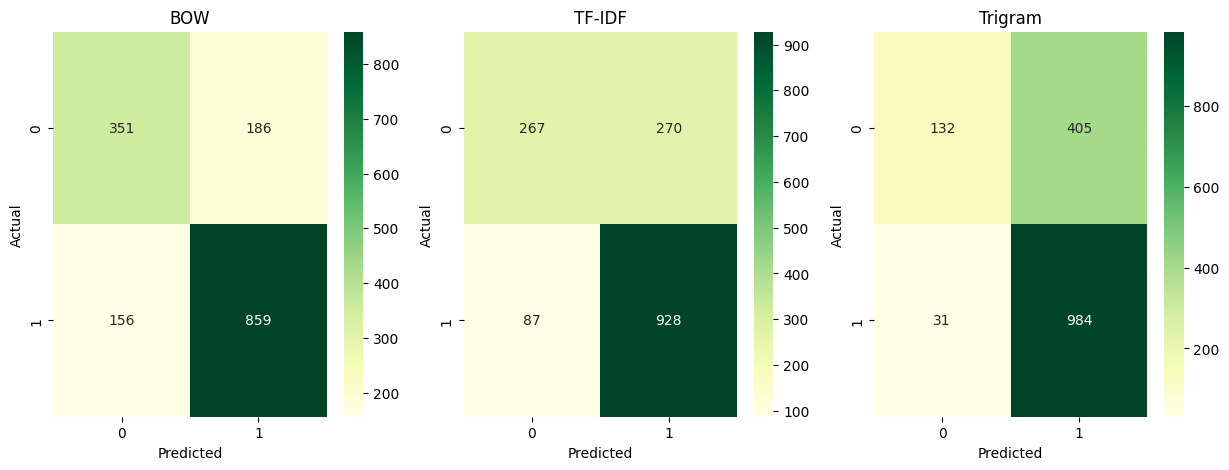

In [8]:
fig, axes =  plt.subplots(1,3,sharex=True,squeeze=False, figsize=(15, 5))

for i in range(3):
  sns.heatmap((confusion_matrix(y_test[i],y_pred_test[i])),annot=True,fmt='.5g',cmap="YlGn",ax=axes[0][i]);
  axes[0][i].set_title(feature_names[i])
  axes[0][i].set_xlabel("Predicted")
  axes[0][i].set_ylabel("Actual")